In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

def plot_status_heatmap(df, index, title="AoC 2024 Puzzle Solvability by ChatGPT - direct attempt"):
    """
    Plots a heatmap of status per language/attempt per Day-Part puzzle attempt.

    Parameters:
        df (pd.DataFrame): DataFrame with columns ['Day', 'Part', 'Status', and `index`].
        index (str): Column to use as row index in the heatmap.
        title (str): Title of the plot.
    """
    # Prepare Day-Part
    df = df.copy()
    df["Day-Part"] = df["Day"].astype(str) + "-" + df["Part"].astype(str).str.extract(r'(\d+)')[0]

    # Pivot table
    pivot_df = df.pivot_table(index=index, columns="Day-Part", values="Status", aggfunc="first")
    sorted_columns = sorted(pivot_df.columns, key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))
    pivot_df = pivot_df[sorted_columns]

    # Status mapping
    status_order = ["CORRECT", "INCORRECT", "TIMEOUT", "ERROR"]
    color_palette = {
        "CORRECT": "#2ca02c",
        "INCORRECT": "#ff7f0e",
        "TIMEOUT": "#1f77b4",
        "ERROR": "#d62728",
    }
    status_codes = {status: i for i, status in enumerate(status_order)}
    numeric_matrix = pivot_df.replace(status_codes)
    cmap = sns.color_palette([color_palette[status] for status in status_order])

    # Adaptive figure height
    row_height = 0.4
    max_height = 8
    height = min(max_height, row_height * len(pivot_df))
    fig, ax = plt.subplots(figsize=(12, height))

    # Heatmap
    sns.heatmap(numeric_matrix, cmap=cmap, cbar=False,
                linewidths=0.3, linecolor='gray', square=True,
                xticklabels=True, yticklabels=True, ax=ax)

    title_size = 12
    label_size = 10
    tick_size = 6

    ax.set_title(title, fontsize=title_size)
    ax.set_xlabel("Puzzle (Day-Part)", fontsize=label_size)
    ax.set_ylabel(index, fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)

    # Legend setup
    legend_elements = [
        Patch(facecolor=color_palette[status], label=status.replace("_", " ").title())
        for status in status_order
    ]
    legend_title_size = 10 
    legend_label_size = 8 

    fig.legend(
        handles=legend_elements,
        title="Status",
        loc="upper center",
        bbox_to_anchor=(0.5, -0.02),  # neatly below the plot
        ncol=len(status_order),
        frameon=False,
        title_fontsize=legend_title_size,
        fontsize=legend_label_size
    )

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

def plot_status_barchart(df, title="AoC 2024 Puzzle Solvability by ChatGPT - direct attempt"):
    """
    Plots a stacked horizontal bar chart showing percentage of puzzle outcomes per language.

    Parameters:
        df (pd.DataFrame): DataFrame with columns ['Language', 'Status'] at minimum.
        title (str): Title of the chart.
    """
    # Define consistent status order and colors
    status_order = ["CORRECT", "INCORRECT", "TIMEOUT", "ERROR"]
    color_palette = {
        "CORRECT": "#2ca02c",
        "INCORRECT": "#ff7f0e",
        "TIMEOUT": "#1f77b4",
        "ERROR": "#d62728",
    }

    # Compute normalized percentages
    status_counts = (
        df.groupby("Language")["Status"]
        .value_counts(normalize=True)
        .unstack(fill_value=0)[status_order] * 100
    )

    # Colors for plot
    colors = [color_palette[status] for status in status_order]

    # Plot
    plt.figure(figsize=(12, 8))
    status_counts.plot(kind="barh", stacked=True, color=colors, width=0.8)

    # Formatting
    plt.xlabel("Solved Puzzles (%)")
    plt.ylabel("Language")
    plt.title(title, fontsize=12)

    # Legend
    legend_elements = [
        Patch(facecolor=color_palette[status], label=status.replace("_", " ").title())
        for status in status_order
    ]
    plt.legend(handles=legend_elements, title="Status", bbox_to_anchor=(1.05, 1), loc='upper left')

    bottom_padding = 0.08 + len(pivot_df) * 0.01
    plt.tight_layout(rect=[0, bottom_padding, 1, 1])


    plt.show()


In [28]:
# Load the CSV file
direct_attempt_path = "reports/direct_attempt.csv"
direct_attempt = pd.read_csv(direct_attempt_path)


direct_attempt.head()


,Day,Part,Language,Attempt,Output,Expected Output,Status,Error Message,Execution Time (s),Date/Time
0,1,1,python,Direct_Attempt,1646452,1646452,CORRECT,NaN,0.007,2025-05-12 20:46:50
1,1,2,python,Direct_Attempt,23609874,23609874,CORRECT,NaN,0.008,2025-05-12 20:46:50
2,2,1,python,Direct_Attempt,524,524,CORRECT,NaN,0.008,2025-05-12 20:46:50
3,2,2,python,Direct_Attempt,569,569,CORRECT,NaN,0.010,2025-05-12 20:46:50
4,3,1,python,Direct_Attempt,167650499,167650499,CORRECT,NaN,0.011,2025-05-12 20:46:50


In [29]:

translation_path = "reports/translations.csv"
translation = pd.read_csv(translation_path)


# Rename the values in the 'Attempt' column
translation["Attempt"] = translation["Attempt"].str.replace("_", " ").str.title()

translation["Attempt"] = translation["Attempt"].str.extract(
    r"Translation Attempt (.+)", expand=False
).str.strip().str.title()

translation.head()

,Day,Part,Language,Attempt,Output,Expected Output,Status,Error Message,Execution Time (s),Date/Time
0,1,1,clojure,C To Clojure,1646452,1646452,CORRECT,NaN,0.768,2025-05-12 21:16:21
1,1,2,clojure,C To Clojure,23609874,23609874,CORRECT,NaN,0.487,2025-05-12 21:16:22
2,6,1,clojure,C To Clojure,NaN,5312,ERROR,Unknown error (exit 1): Execution error (FileN...,0.472,2025-05-12 21:16:22
3,1,1,python,C To Python,1646452,1646452,CORRECT,NaN,0.008,2025-05-12 21:16:22
4,1,2,python,C To Python,23609874,23609874,CORRECT,NaN,0.009,2025-05-12 21:16:22


/tmp/ipykernel_164593/2771578754.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_matrix = pivot_df.replace(status_codes)


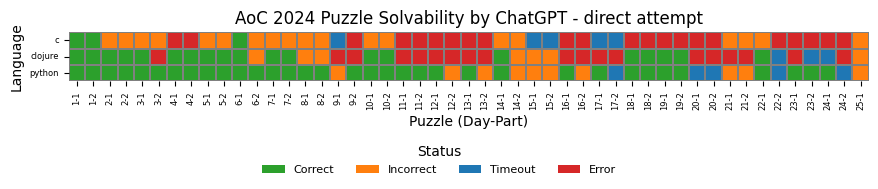

In [51]:
plot_status_heatmap(
    direct_attempt,
    index="Language",
    title="AoC 2024 Puzzle Solvability by ChatGPT - direct attempt",
)


/tmp/ipykernel_164593/2771578754.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_matrix = pivot_df.replace(status_codes)


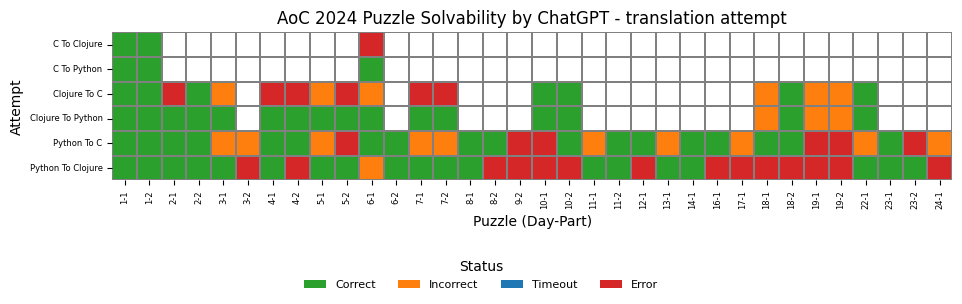

In [52]:
plot_status_heatmap(
    translation,
    index="Attempt",
    title="AoC 2024 Puzzle Solvability by ChatGPT - translation attempt",
)

In [54]:
direct_attempt["prompt"] = direct_attempt["Language"]
translation["prompt"] = translation["Attempt"]
combined_df = pd.concat([direct_attempt, translation], ignore_index=True)
print(combined_df["prompt"].unique())

custom_order = [
    "c", "C To Python", "C To Clojure",
    "python", "Python To C", "Python To Clojure",
    "clojure", "Clojure To Python", "Clojure To C"
]

combined_df["prompt"] = pd.Categorical(combined_df["prompt"], categories=custom_order, ordered=True)



['python' 'c' 'clojure' 'C To Clojure' 'C To Python' 'Python To Clojure'
 'Python To C' 'Clojure To C' 'Clojure To Python']


/tmp/ipykernel_164593/2771578754.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index=index, columns="Day-Part", values="Status", aggfunc="first")
/tmp/ipykernel_164593/2771578754.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_matrix = pivot_df.replace(status_codes)


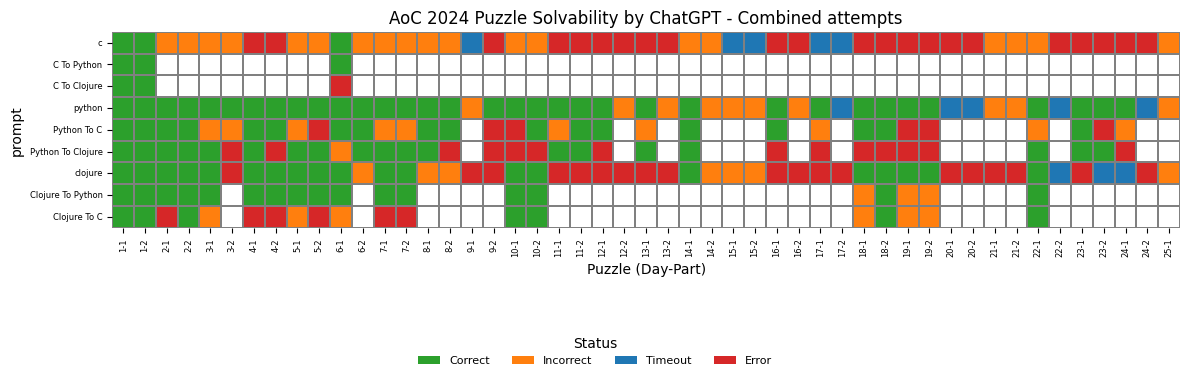

In [55]:
plot_status_heatmap(
    combined_df,
    index="prompt",
    title="AoC 2024 Puzzle Solvability by ChatGPT - Combined attempts",
)